# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [1]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

/tmp/ipykernel_519750/2994295117.py:8: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


In [2]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter)
filterResponseSobelX = signal.convolve2d(image, sobelX)
filterResponseSobelY = signal.convolve2d(image, sobelY)

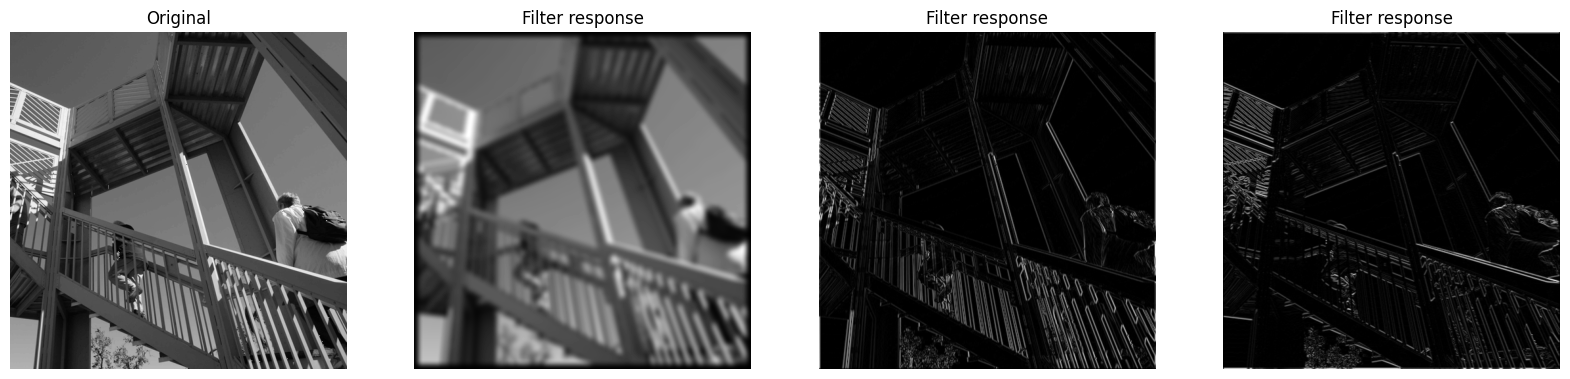

In [3]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

### Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?
The Gaussian filter essentially blurs the image by averaging the pixel values using a gaussian distribution. The sobelX and sobelY filters extract vertical and horizontal lines respectively. This darkens the constant color regions of the image, and enhances the abrupt edges.

### Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?
The original image dimensions are 512x512. It has just one channel, indicating black and white. A normal color image usually has three channels (RGB).

### Question 3: What is the size of the different filters?
The Gaussian filter is 15 by 15, and the sobelX and sobelY are 3 by 3.

### Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?
When the argument mode is set to "same", the filter response size is 512 by 512 (same as image).

### Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 
The size is 498 by 498 for the Gaussian filter. This is because the Gaussian filter is 15 by 15 and it decreases the image by 7 pixels on each side. The sobel filters decrease the output image size by 1 pixel on each side because the filters are only 3 by 3.

### Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?
Because the layers get progressively smaller and this happens really fast with small images.


In [4]:
# Your code for checking sizes of image and filter responses

print(image.shape)

# Perform convolution using the function 'convolve2d' for the different filters
# mode = same
filterResponseGauss = signal.convolve2d(image, in2 = gaussFilter, mode="same")
filterResponseSobelX = signal.convolve2d(image, in2 = sobelX, mode="same")
filterResponseSobelY = signal.convolve2d(image, in2 = sobelY, mode="same")

print(filterResponseGauss.shape)
print(filterResponseSobelX.shape)
print(filterResponseSobelY.shape)

# Perform convolution using the function 'convolve2d' for the different filters
# mode = valid
filterResponseGauss = signal.convolve2d(image, in2 = gaussFilter, mode="valid")
filterResponseSobelX = signal.convolve2d(image, in2 = sobelX, mode="valid")
filterResponseSobelY = signal.convolve2d(image, in2 = sobelY, mode="valid")

print(filterResponseGauss.shape)
print(filterResponseSobelX.shape)
print(filterResponseSobelY.shape)


(512, 512)
(512, 512)
(512, 512)
(512, 512)
(498, 498)
(510, 510)
(510, 510)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [5]:
# import os
# import warnings

# # Ignore FutureWarning from numpy
# warnings.simplefilter(action='ignore', category=FutureWarning)

# import keras.backend as K
# import tensorflow as tf

# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# # The GPU id to use, usually either "0" or "1";
# os.environ["CUDA_VISIBLE_DEVICES"]="0";

# # Allow growth of GPU memory, otherwise it will always look like all the memory is being used
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?

### Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 
Because the images have three color channels.

### Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?
The implementations are different. THe Conv2D class is used to add a convolutional layer to a neural network architecture in Keras, while the convolve2d performs the convolution immediately.


### Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.
We suspect that the GPU has a speedup that grows faster than linear, given that it has many more cores than the CPU, allowing parallellisation. Thus the speedup would be substantially more noticeable on the bigger dataset.

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [6]:
from tensorflow.keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

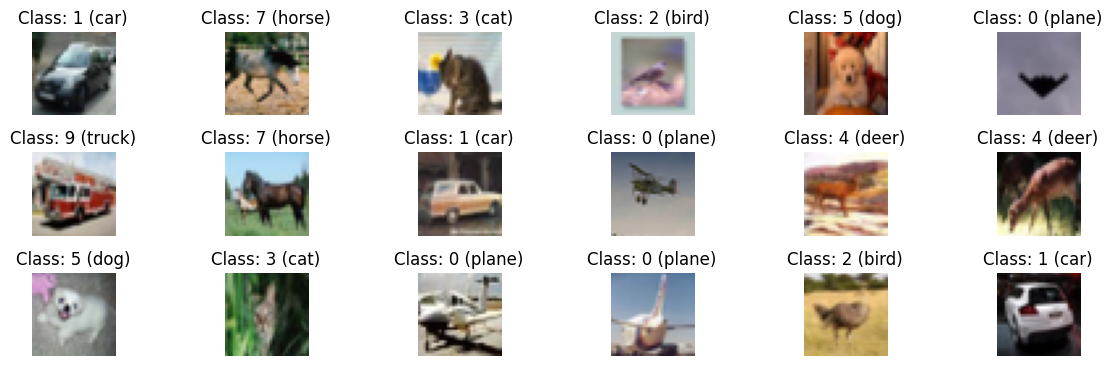

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25)

# Print the size of training data, validation data and test data
print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced validation images have size %s and labels have size %s " % (Xval.shape, Yval.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

Reduced training images have size (7500, 32, 32, 3) and labels have size (7500, 1) 
Reduced validation images have size (2500, 32, 32, 3) and labels have size (2500, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 



##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [9]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [10]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
Ytrain.shape

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, num_classes=len(np.unique(Ytrain)))
Yval = to_categorical(Yval, num_classes=len(np.unique(Yval)))
Ytest = to_categorical(Ytest, num_classes=len(np.unique(Ytest)))

# Print shapes after converting the labels
print("Train response has shape", Ytrain.shape)
print("Validation response has shape", Yval.shape)
print("Test response has shape", Ytest.shape)

Train response has shape (7500, 10)
Validation response has shape (2500, 10)
Test response has shape (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [11]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters=n_filters, kernel_size=(3,3), padding="same", activation="relu", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())

    n_filters *= 2

    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add(Conv2D(filters=n_filters, kernel_size=(3,3), padding="same", activation="relu", input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(MaxPooling2D())

        n_filters *= 2
    
    # Add flatten layer
    model.add(Flatten())

    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(units=n_nodes, activation="relu"))
        model.add(BatchNormalization())

        if use_dropout:
            model.add(Dropout(0.5))

    # Add final dense layer
    model.add(Dense(units=10, activation="softmax"))

    # Compile model
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=learning_rate), metrics=["accuracy"])
    
    return model

In [12]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [13]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model1 = build_CNN(input_shape=input_shape)

# Train the model  using training data and validation data
history1 = model1.fit(x=Xtrain, y=Ytrain, validation_data=(Xval, Yval), batch_size=batch_size, epochs=epochs)

Epoch 1/20
75/75 [==============================] - 5s 57ms/step - loss: 2.9962 - accuracy: 0.3169 - val_loss: 1.8740 - val_accuracy: 0.3596
Epoch 2/20
75/75 [==============================] - 4s 55ms/step - loss: 1.5216 - accuracy: 0.4783 - val_loss: 1.7024 - val_accuracy: 0.3812
Epoch 3/20
75/75 [==============================] - 5s 61ms/step - loss: 1.2359 - accuracy: 0.5637 - val_loss: 1.6878 - val_accuracy: 0.3876
Epoch 4/20
75/75 [==============================] - 5s 71ms/step - loss: 1.0811 - accuracy: 0.6128 - val_loss: 1.4661 - val_accuracy: 0.4616
Epoch 5/20
75/75 [==============================] - 4s 55ms/step - loss: 0.9597 - accuracy: 0.6571 - val_loss: 1.3711 - val_accuracy: 0.5248
Epoch 6/20
75/75 [==============================] - 4s 58ms/step - loss: 0.8872 - accuracy: 0.6836 - val_loss: 1.4366 - val_accuracy: 0.5272
Epoch 7/20
75/75 [==============================] - 5s 72ms/step - loss: 0.8018 - accuracy: 0.7193 - val_loss: 1.3165 - val_accuracy: 0.5680
Epoch 8/20
75

In [14]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(x=Xtest, y=Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 4ms/step - loss: 2.7308 - accuracy: 0.5575
Test loss: 2.7308
Test accuracy: 0.5575


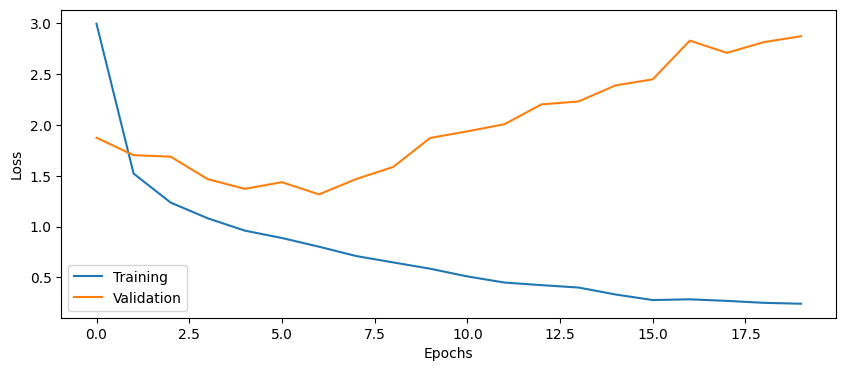

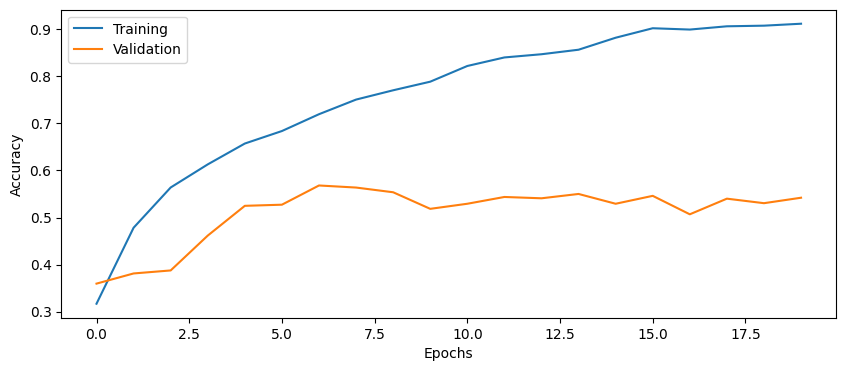

In [15]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

### Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 
The test accuracy is about 54%, which is quite bad, but better than just random guessing. We are thus not satisfied.

### Question 10: How big is the difference between training and test accuracy?
The difference is about 36% points, indicating overfitting.

### Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?
Because in the DNN lab our training data had over 500,000 rows, setting the batch size to 10,000, meant we were updating the weights 50 times per epoch. Here we only had 7500 training rows, so we need smaller batch sizes to perform roughly the same number of updates.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [16]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape=input_shape, n_dense_layers=1)

# Train the model  using training data and validation data
history2 = model2.fit(x=Xtrain, y=Ytrain, validation_data=(Xval, Yval), batch_size=batch_size, epochs=epochs)

Epoch 1/20
75/75 [==============================] - 4s 44ms/step - loss: 1.6388 - accuracy: 0.4172 - val_loss: 2.0633 - val_accuracy: 0.2952
Epoch 2/20
75/75 [==============================] - 3s 40ms/step - loss: 1.2560 - accuracy: 0.5501 - val_loss: 1.9443 - val_accuracy: 0.2964
Epoch 3/20
75/75 [==============================] - 3s 40ms/step - loss: 1.0670 - accuracy: 0.6221 - val_loss: 1.9521 - val_accuracy: 0.3648
Epoch 4/20
75/75 [==============================] - 3s 41ms/step - loss: 0.8746 - accuracy: 0.6927 - val_loss: 1.5943 - val_accuracy: 0.4724
Epoch 5/20
75/75 [==============================] - 3s 40ms/step - loss: 0.7047 - accuracy: 0.7509 - val_loss: 1.7240 - val_accuracy: 0.4864
Epoch 6/20
75/75 [==============================] - 3s 40ms/step - loss: 0.5189 - accuracy: 0.8183 - val_loss: 1.5361 - val_accuracy: 0.5592
Epoch 7/20
75/75 [==============================] - 3s 41ms/step - loss: 0.3734 - accuracy: 0.8708 - val_loss: 1.8377 - val_accuracy: 0.5520
Epoch 8/20
75

In [17]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(x=Xtest, y=Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 2.8288 - accuracy: 0.5590
Test loss: 2.8288
Test accuracy: 0.5590


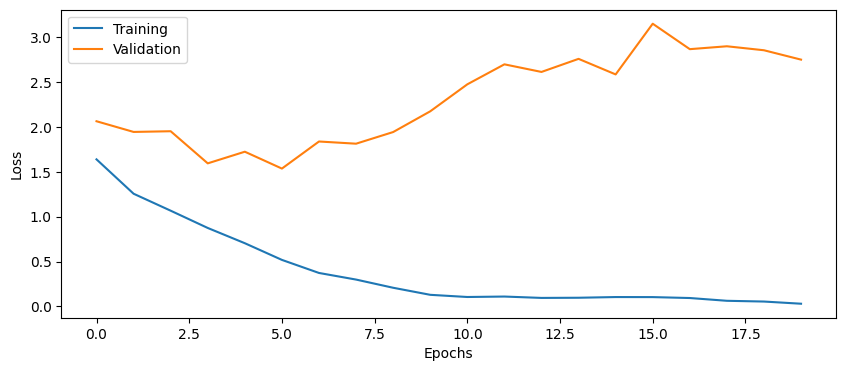

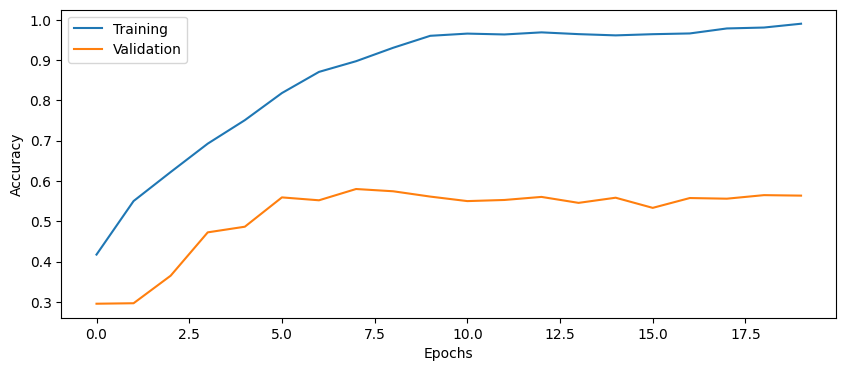

In [18]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [19]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape=input_shape, n_dense_layers=1, n_conv_layers=4)

# Train the model  using training data and validation data
history3 = model3.fit(x=Xtrain, y=Ytrain, validation_data=(Xval, Yval), batch_size=batch_size, epochs=epochs)

Epoch 1/20
75/75 [==============================] - 5s 56ms/step - loss: 1.7099 - accuracy: 0.3771 - val_loss: 2.0275 - val_accuracy: 0.2780
Epoch 2/20
75/75 [==============================] - 4s 54ms/step - loss: 1.3760 - accuracy: 0.4915 - val_loss: 1.7393 - val_accuracy: 0.3712
Epoch 3/20
75/75 [==============================] - 4s 54ms/step - loss: 1.1798 - accuracy: 0.5723 - val_loss: 1.5553 - val_accuracy: 0.4576
Epoch 4/20
75/75 [==============================] - 4s 54ms/step - loss: 1.0014 - accuracy: 0.6397 - val_loss: 1.5055 - val_accuracy: 0.5120
Epoch 5/20
75/75 [==============================] - 4s 54ms/step - loss: 0.8603 - accuracy: 0.6943 - val_loss: 1.7026 - val_accuracy: 0.5096
Epoch 6/20
75/75 [==============================] - 4s 54ms/step - loss: 0.7329 - accuracy: 0.7405 - val_loss: 1.5622 - val_accuracy: 0.5456
Epoch 7/20
75/75 [==============================] - 4s 54ms/step - loss: 0.5770 - accuracy: 0.7963 - val_loss: 1.6010 - val_accuracy: 0.5996
Epoch 8/20
75

In [20]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(x=Xtest, y=Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 6ms/step - loss: 2.5192 - accuracy: 0.5980
Test loss: 2.5192
Test accuracy: 0.5980


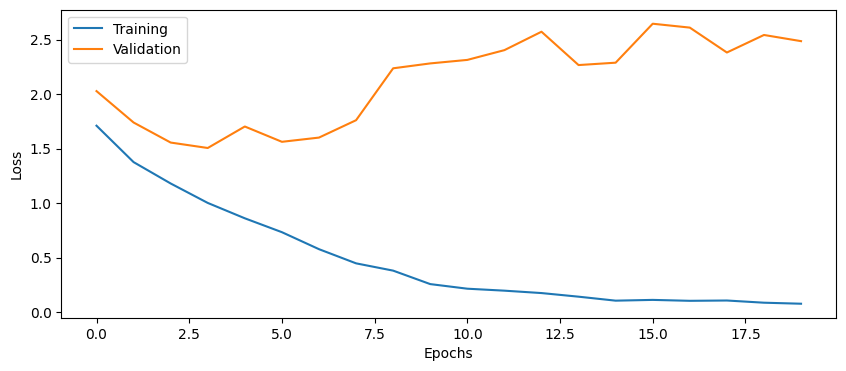

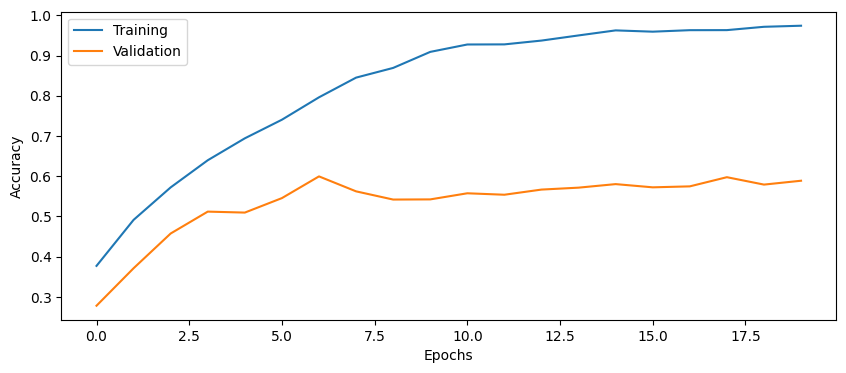

In [21]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

### Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?
Roughly 124180. The last convolutional layer has the most trainable parameters, because it has the biggest number of filters.

### Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 
The input is the output of the max pooling layer of the previous block. The output of the conv2D layer is the result of applying the convolution. The output dimensions are changed only in the number of channels, which is doubled.

### Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/
Yes it is.

### Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?
It will have 128 channels, because that is the number of filters.

### Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?
It appears as though Keras internally, automatically, accounts for the fact that the input has multiple channels by extending the filters with a third dimension with a height equal to that number of channels. So in the first convolution, the number of parameters is (3 * 3 * 3) * 16 + 16 = 448 which is backed up by receipts below.

### Question 17: How does MaxPooling help in reducing the number of parameters to train?
It pools multiple pixels and thus reduces the image size.

In [22]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

### Question 18: How much did the test accuracy improve with dropout, compared to without dropout?
Before we had roughly 58% test accuracy, and now with dropout we achieve 61% test accuracy.

### Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?
There is early stopping, we could add L1 or L2 regularization to the cost function.

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [23]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape=input_shape, n_dense_layers=1, n_conv_layers=4, use_dropout=True)

# Train the model  using training data and validation data
history4 = model4.fit(x=Xtrain, y=Ytrain, validation_data=(Xval, Yval), batch_size=batch_size, epochs=epochs)

Epoch 1/20
75/75 [==============================] - 5s 57ms/step - loss: 2.0251 - accuracy: 0.2983 - val_loss: 1.8378 - val_accuracy: 0.2936
Epoch 2/20
75/75 [==============================] - 4s 55ms/step - loss: 1.5998 - accuracy: 0.4127 - val_loss: 1.9237 - val_accuracy: 0.2804
Epoch 3/20
75/75 [==============================] - 4s 56ms/step - loss: 1.4441 - accuracy: 0.4733 - val_loss: 1.9532 - val_accuracy: 0.3452
Epoch 4/20
75/75 [==============================] - 5s 61ms/step - loss: 1.3077 - accuracy: 0.5228 - val_loss: 1.4581 - val_accuracy: 0.4744
Epoch 5/20
75/75 [==============================] - 5s 62ms/step - loss: 1.2097 - accuracy: 0.5599 - val_loss: 1.9245 - val_accuracy: 0.4364
Epoch 6/20
75/75 [==============================] - 4s 58ms/step - loss: 1.0883 - accuracy: 0.6123 - val_loss: 1.5330 - val_accuracy: 0.5112
Epoch 7/20
75/75 [==============================] - 4s 53ms/step - loss: 1.0019 - accuracy: 0.6369 - val_loss: 1.5303 - val_accuracy: 0.5172
Epoch 8/20
75

In [24]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(x=Xtest, y=Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 6ms/step - loss: 1.9902 - accuracy: 0.6170
Test loss: 1.9902
Test accuracy: 0.6170


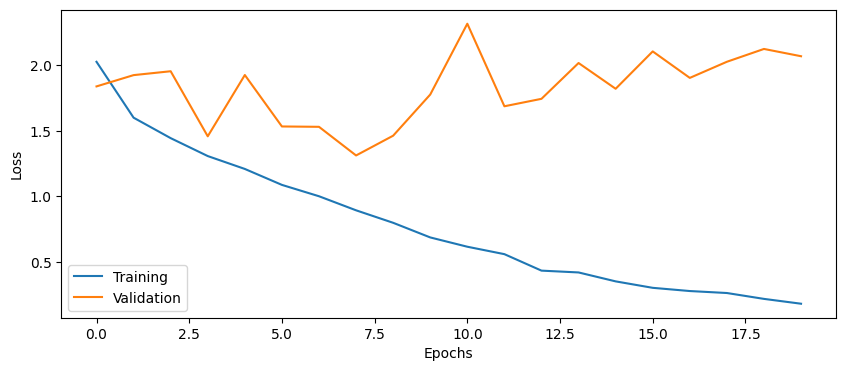

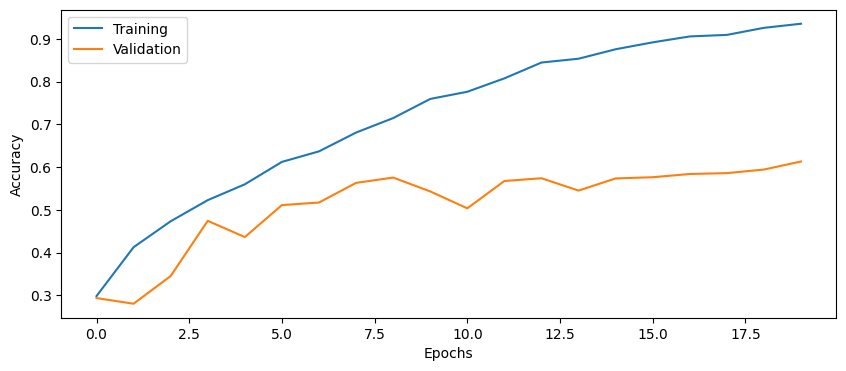

In [25]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

#### Question 20: How high test accuracy can you obtain? What is your best configuration?
In our best configuration, we obtained a test accuracy of about 60%

## Your best config

In [26]:
# Setup some training parameters
batch_size = 150 #100
epochs = 40
input_shape = Xtrain.shape[1:]

# Build model
model5 = build_CNN(input_shape=input_shape, n_dense_layers=1, n_conv_layers=4, use_dropout=True)

# Train the model  using training data and validation data
history5 = model5.fit(x=Xtrain, y=Ytrain, validation_data=(Xval, Yval), batch_size=batch_size, epochs=epochs)

Epoch 1/40
50/50 [==============================] - 5s 81ms/step - loss: 2.0811 - accuracy: 0.2775 - val_loss: 1.7300 - val_accuracy: 0.3616
Epoch 2/40
50/50 [==============================] - 4s 79ms/step - loss: 1.5917 - accuracy: 0.4045 - val_loss: 1.9658 - val_accuracy: 0.2948
Epoch 3/40
50/50 [==============================] - 4s 80ms/step - loss: 1.4522 - accuracy: 0.4604 - val_loss: 2.2109 - val_accuracy: 0.2596
Epoch 4/40
50/50 [==============================] - 4s 82ms/step - loss: 1.3090 - accuracy: 0.5191 - val_loss: 2.0164 - val_accuracy: 0.3260
Epoch 5/40
50/50 [==============================] - 4s 84ms/step - loss: 1.2123 - accuracy: 0.5603 - val_loss: 1.5426 - val_accuracy: 0.4432
Epoch 6/40
50/50 [==============================] - 4s 80ms/step - loss: 1.1078 - accuracy: 0.6013 - val_loss: 1.5775 - val_accuracy: 0.4640
Epoch 7/40
50/50 [==============================] - 5s 96ms/step - loss: 0.9797 - accuracy: 0.6553 - val_loss: 1.4479 - val_accuracy: 0.5348
Epoch 8/40
50

In [27]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(x=Xtest, y=Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 2.6683 - accuracy: 0.6100
Test loss: 2.6683
Test accuracy: 0.6100


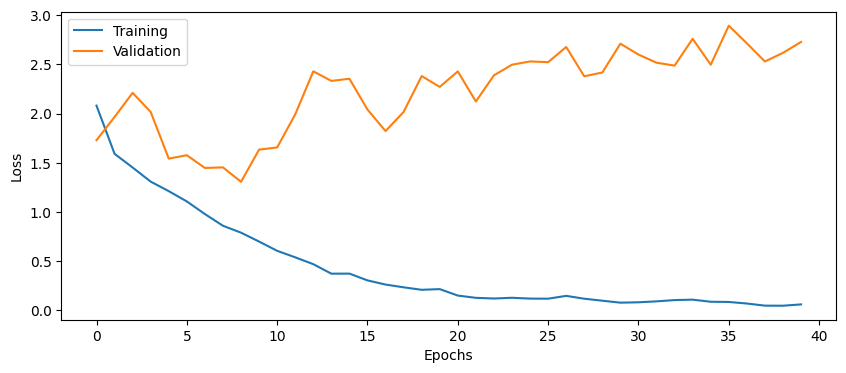

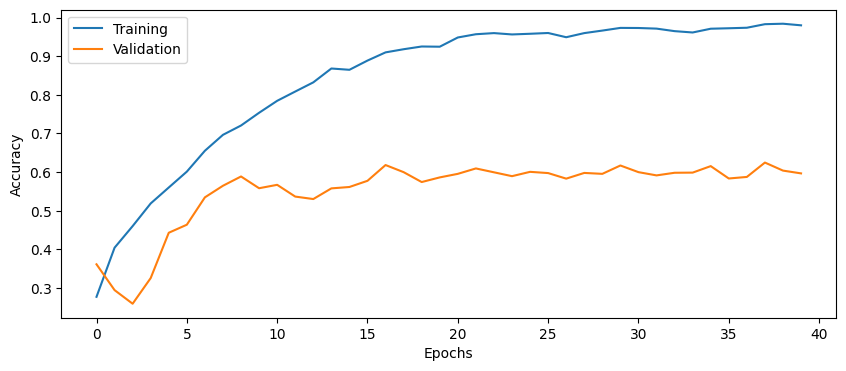

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_16 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                      

In [28]:
# Plot the history from the training run
plot_results(history5)

model5.summary()

##  Part 16: Rotate the test images: Rotate each test image 90 degrees, the cells are already finished.

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

### Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

The "best" CNN we achieved above does not generalise well at all; it achieves a test accuracy of about 21 % which is far lower than the 60 % achieved on the not-rotated data, and only marginaly better than random chance (10 %).

In [29]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

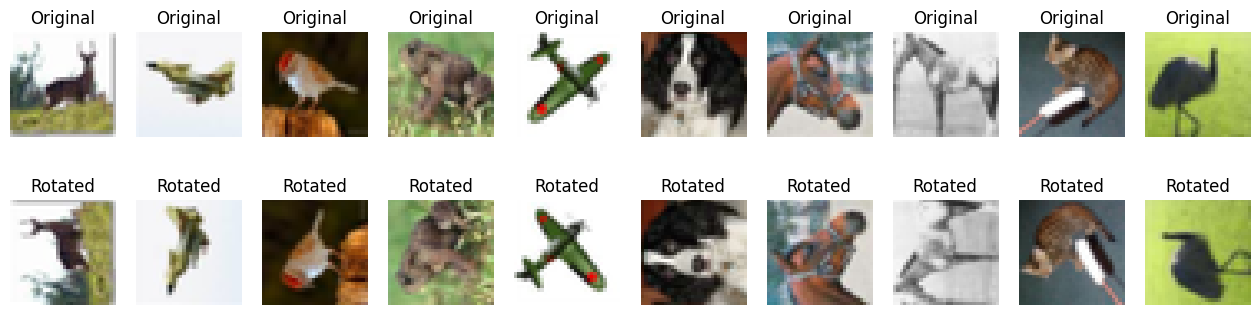

In [30]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [31]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(x=Xtest_rotated, y=Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 7.7449 - accuracy: 0.2200
Test loss: 7.7449
Test accuracy: 0.2200


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [32]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [33]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.2, rotation_range=30, horizontal_flip=True, vertical_flip=True)

# Setup a flow for training data, assume that we can fit all images into CPU memory
train_dg = datagen.flow(Xtrain, Ytrain)

# Setup a flow for validation data, assume that we can fit all images into CPU memory
val_dg = datagen.flow(Xval, Yval)

## Part 18: What about big data?

### Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?
Use a smaller batch size for the flow. The disadvantage is that the generated data is only based on the batch and not on the entire dataset.

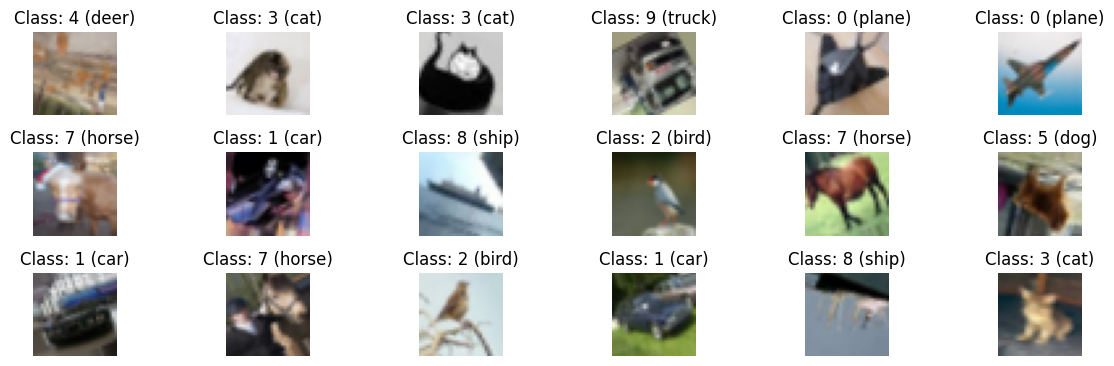

In [34]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

#### Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?
The training accuracy is increasing much more slowly with augmentation than it did without augmentation. Without, we were seeing training accuracies of over 90% after only 20 epochs. It makes sense, because with augmentation the model has to learn much more complicated patterns for each class than it did without augmentation. For this reason, we must increase the number of epochs in order to iterate through the data more often. 

#### Question 24: What other types of image augmentation can be applied, compared to what we use here?
Random noise could be added to the images to simulate poor quality images, as well as zooming/scaling or applying color transformations just to name a few examples.

In [35]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:]

# Build model (your best config)
model6 = build_CNN(input_shape=input_shape, n_dense_layers=1, n_conv_layers=4, use_dropout=True)

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = model6.fit(train_dg, validation_data=val_dg, batch_size=batch_size, epochs=epochs, 
                      steps_per_epoch=len(Xtrain) * (1 - validation_split) / batch_size,
                      validation_steps=len(Xtrain) * validation_split / batch_size)

Epoch 1/200
80/80 [==============================] - 3s 27ms/step - loss: 2.4063 - accuracy: 0.1762 - val_loss: 2.3594 - val_accuracy: 0.2156
Epoch 2/200
80/80 [==============================] - 2s 24ms/step - loss: 2.0001 - accuracy: 0.2492 - val_loss: 2.0505 - val_accuracy: 0.2156
Epoch 3/200
80/80 [==============================] - 2s 24ms/step - loss: 1.8995 - accuracy: 0.2746 - val_loss: 1.8971 - val_accuracy: 0.2906
Epoch 4/200
80/80 [==============================] - 2s 23ms/step - loss: 1.8841 - accuracy: 0.2913 - val_loss: 1.9292 - val_accuracy: 0.2891
Epoch 5/200
80/80 [==============================] - 2s 25ms/step - loss: 1.8471 - accuracy: 0.2902 - val_loss: 1.8497 - val_accuracy: 0.3266
Epoch 6/200
80/80 [==============================] - 2s 25ms/step - loss: 1.7937 - accuracy: 0.3395 - val_loss: 1.9164 - val_accuracy: 0.3281
Epoch 7/200
80/80 [==============================] - 2s 25ms/step - loss: 1.7556 - accuracy: 0.3398 - val_loss: 1.7495 - val_accuracy: 0.3313
Epoch 

80/80 [==============================] - 2s 24ms/step - loss: 1.2494 - accuracy: 0.5492 - val_loss: 1.1974 - val_accuracy: 0.5734
Epoch 59/200
80/80 [==============================] - 2s 24ms/step - loss: 1.2565 - accuracy: 0.5469 - val_loss: 1.1786 - val_accuracy: 0.5688
Epoch 60/200
80/80 [==============================] - 2s 24ms/step - loss: 1.2809 - accuracy: 0.5625 - val_loss: 1.1462 - val_accuracy: 0.5938
Epoch 61/200
80/80 [==============================] - 2s 25ms/step - loss: 1.2388 - accuracy: 0.5508 - val_loss: 1.2213 - val_accuracy: 0.5594
Epoch 62/200
80/80 [==============================] - 2s 24ms/step - loss: 1.2497 - accuracy: 0.5598 - val_loss: 1.1677 - val_accuracy: 0.5922
Epoch 63/200
80/80 [==============================] - 2s 25ms/step - loss: 1.2225 - accuracy: 0.5559 - val_loss: 1.1778 - val_accuracy: 0.5562
Epoch 64/200
80/80 [==============================] - 2s 23ms/step - loss: 1.2162 - accuracy: 0.5562 - val_loss: 1.0749 - val_accuracy: 0.5969
Epoch 65/200

80/80 [==============================] - 2s 24ms/step - loss: 1.0960 - accuracy: 0.6117 - val_loss: 0.9921 - val_accuracy: 0.6469
Epoch 116/200
80/80 [==============================] - 2s 23ms/step - loss: 1.0851 - accuracy: 0.6195 - val_loss: 1.0179 - val_accuracy: 0.6266
Epoch 117/200
80/80 [==============================] - 2s 24ms/step - loss: 1.0669 - accuracy: 0.6340 - val_loss: 1.0325 - val_accuracy: 0.6531
Epoch 118/200
80/80 [==============================] - 2s 25ms/step - loss: 1.0720 - accuracy: 0.6238 - val_loss: 0.9584 - val_accuracy: 0.6453
Epoch 119/200
80/80 [==============================] - 2s 26ms/step - loss: 1.0617 - accuracy: 0.6262 - val_loss: 1.0014 - val_accuracy: 0.6234
Epoch 120/200
80/80 [==============================] - 2s 24ms/step - loss: 1.0229 - accuracy: 0.6384 - val_loss: 0.9720 - val_accuracy: 0.6375
Epoch 121/200
80/80 [==============================] - 2s 24ms/step - loss: 1.0473 - accuracy: 0.6250 - val_loss: 0.8962 - val_accuracy: 0.6734
Epoch 

Epoch 172/200
80/80 [==============================] - 2s 23ms/step - loss: 0.9993 - accuracy: 0.6570 - val_loss: 0.7598 - val_accuracy: 0.7234
Epoch 173/200
80/80 [==============================] - 2s 23ms/step - loss: 0.9944 - accuracy: 0.6559 - val_loss: 0.8732 - val_accuracy: 0.7047
Epoch 174/200
80/80 [==============================] - 2s 24ms/step - loss: 0.9576 - accuracy: 0.6694 - val_loss: 0.8574 - val_accuracy: 0.6984
Epoch 175/200
80/80 [==============================] - 2s 25ms/step - loss: 0.9775 - accuracy: 0.6664 - val_loss: 0.7836 - val_accuracy: 0.7406
Epoch 176/200
80/80 [==============================] - 2s 25ms/step - loss: 0.9524 - accuracy: 0.6711 - val_loss: 0.8415 - val_accuracy: 0.7109
Epoch 177/200
80/80 [==============================] - 2s 25ms/step - loss: 0.9515 - accuracy: 0.6836 - val_loss: 0.8551 - val_accuracy: 0.7016
Epoch 178/200
80/80 [==============================] - 2s 23ms/step - loss: 0.9206 - accuracy: 0.6871 - val_loss: 0.8079 - val_accuracy:

In [36]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.0402
Test accuracy: 0.6350
Test loss: 2.4890
Test accuracy: 0.2865


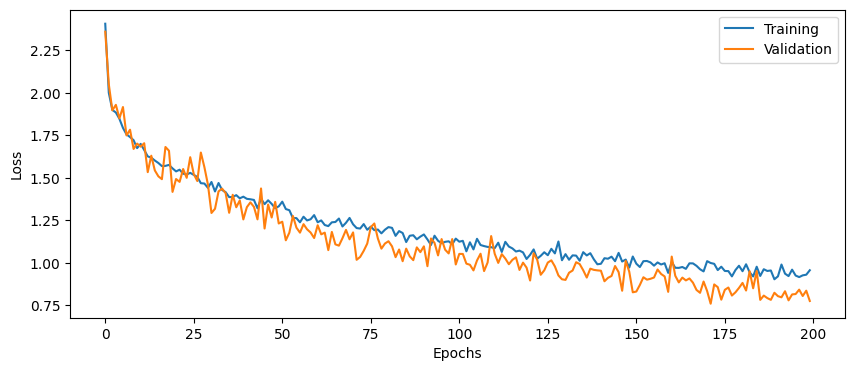

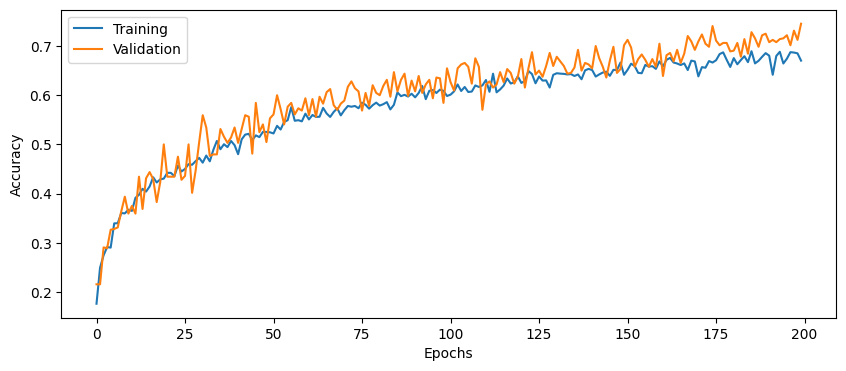

In [37]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [38]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

63/63 [==============================] - 0s 5ms/step


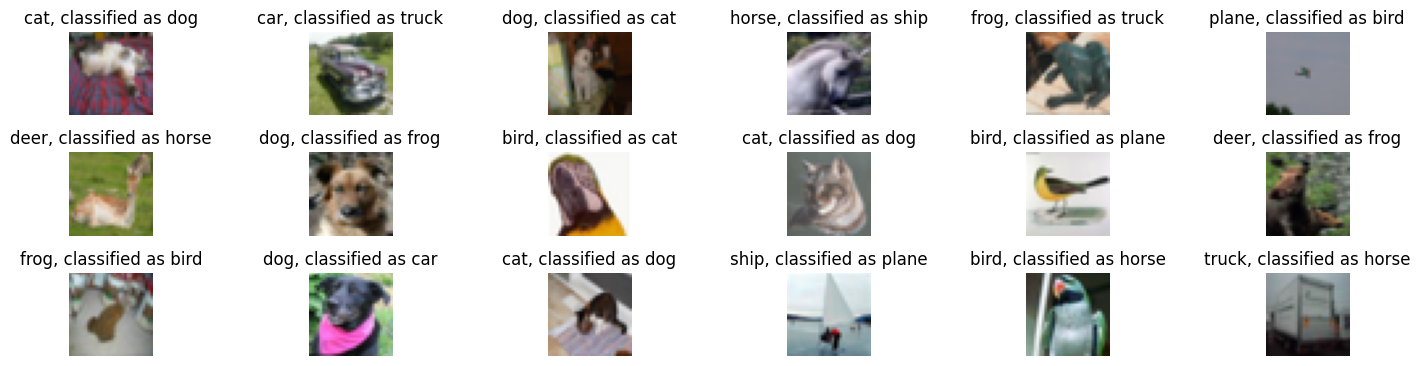

In [39]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

#### Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?
It would be possible to use the CNN on bigger images, sliding it over different frames within the image and classifying each individually. The input must be the same size as it is defined in the model however, so smaller images won't work without padding (which will likely lead to poor performance) and larger images can't be entered as a whole.

#### Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?
Ultimately, the CNN needs to have the same size input as the images it has been trained on. It would be possible to manipulate the input images to the size the CNN expects, though this may be at the cost of performance. Small images could perhaps be enlarged using some sort of interpolation between pixels, there are likely other models that do this well. Larger images need to be compressed down to a smaller size, preferably while preserving important patterns. Again, there's probably models or techniques that are good at this task.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

#### Question 27: How many convolutional layers does ResNet50 have? 
53

#### Question 28: How many trainable parameters does the ResNet50 network have? 
25,583,592

#### Question 29: What is the size of the images that ResNet50 expects as input?
224x224x3

#### Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.
The Hessian matrix would have size 25,583,592x25,583,592 = 654520179622464 which is too large to store in memory alongside all other data.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [40]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.
from keras.applications import ResNet50

# Load in model and print summary
model = ResNet50()
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [86]:
from keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions

# Predict on jellyfish image
image = load_img("jellyfish.jpeg")
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = preprocess_input(input_arr)

# Test that image is correct
# img = array_to_img(input_arr.squeeze())
# img

predictions = model.predict(input_arr)
decode_predictions(predictions, top=5)

1/1 [==============================] - 0s 84ms/step


[[('n01910747', 'jellyfish', 0.99997246),
  ('n01930112', 'nematode', 1.3128146e-05),
  ('n01496331', 'electric_ray', 7.675676e-06),
  ('n02321529', 'sea_cucumber', 1.2996951e-06),
  ('n09256479', 'coral_reef', 1.0487319e-06)]]

In [90]:
# Predict on beagle image
image = load_img("beagle.jpg")
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = preprocess_input(input_arr)

# Test that image is correct
# img = array_to_img(input_arr.squeeze())
# img

predictions = model.predict(input_arr)
decode_predictions(predictions, top=5)

1/1 [==============================] - 0s 84ms/step


[[('n02088364', 'beagle', 0.9777908),
  ('n02089973', 'English_foxhound', 0.014217331),
  ('n02089867', 'Walker_hound', 0.006872797),
  ('n02088238', 'basset', 0.00025451148),
  ('n02100236', 'German_short-haired_pointer', 0.00017316281)]]

In [91]:
# Predict on stick image
image = load_img("stick.jpeg")
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = preprocess_input(input_arr)

# Test that image is correct
# img = array_to_img(input_arr.squeeze())
# img

predictions = model.predict(input_arr)
decode_predictions(predictions, top=5)

1/1 [==============================] - 0s 89ms/step


[[('n02231487', 'walking_stick', 0.92377454),
  ('n01770081', 'harvestman', 0.025268575),
  ('n02236044', 'mantis', 0.022366337),
  ('n01773549', 'barn_spider', 0.012975752),
  ('n02268853', 'damselfly', 0.0067647337)]]

In [92]:
# Predict on colosseum image
image = load_img("colosseum.jpg")
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = preprocess_input(input_arr)

# Test that image is correct
# img = array_to_img(input_arr.squeeze())
# img

predictions = model.predict(input_arr)
decode_predictions(predictions, top=5)

1/1 [==============================] - 0s 84ms/step


[[('n03220513', 'dome', 0.64940166),
  ('n03877845', 'palace', 0.10325882),
  ('n03028079', 'church', 0.047642026),
  ('n02825657', 'bell_cote', 0.03993953),
  ('n03788195', 'mosque', 0.03268704)]]

In [93]:
# Predict on Bertil image
image = load_img("bertil.jpeg")
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = preprocess_input(input_arr)

predictions = model.predict(input_arr)
decode_predictions(predictions, top=5)

1/1 [==============================] - 0s 75ms/step


[[('n04370456', 'sweatshirt', 0.2866162),
  ('n02963159', 'cardigan', 0.19729432),
  ('n03595614', 'jersey', 0.19312713),
  ('n03980874', 'poncho', 0.122507274),
  ('n04599235', 'wool', 0.037831303)]]

The model is very certain about the jellyfish, beagle, and walking stick as these are classes it was trained on. The Colosseum is more difficult as it doesn't specifically know this, but it predicts it to be a dome with 65% certainty which is fair enough. Unfortunately, Bertil wasn't included in the training of the ResNet50 model, nor was Head of Statistics and Machine Learning at LiU, so he is merely classified as a sweatshirt with 29% certainty.